In [2]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
from tabulate import tabulate
from urllib.parse import urlparse, parse_qsl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mongoengine.queryset.visitor import Q
import django
from django.db.models import Count
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from utils.text import *
from utils.plotting import *
from sklearn.feature_extraction.text import *
from sklearn.decomposition import NMF
from scipy.sparse import coo_matrix, find
from django.db.models import Q, F, Sum, Count, FloatField, Case, When

from run_id import run_id
run_id = 662
stat = RunStats.objects.get(pk=run_id)
q = stat.query
print(q.title)
from tmv_app.tasks import *
from utils.text import *


wos_all_updated


In [43]:
yscores = TimeDTopic.objects.filter(
        dtopic__run_id=run_id,
        share__isnull=False,
).order_by('period__n','pgrowth').values('period__n','dtopic__id','dtopic__title','score','share')

df = pd.DataFrame.from_dict(list(yscores))
df['share'] = df['share'] * 100

df.head()

,dtopic__id,dtopic__title,period__n,score,share
0,10742,"{soc, stock, organ}",1,0.000000,0.000000
1,10779,"{food, consumpt, household}",1,0.000000,0.000000
2,10809,"{water, resourc, suppli}",1,1.918460,2.825209
3,10808,"{energi, renew, consumpt}",1,0.468868,0.690476
4,10813,"{carbon, dioxid, sequestr}",1,1.664400,2.451068


,dtopic__id,dtopic__title,period__n,score,share
0,10798,"{environment, impact, life}",1,0.659587,0.009713
1,10805,"{forest, tropic, stand}",1,1.048362,0.015439
2,10778,"{trend, station, year}",1,0.772448,0.011375
3,10733,"{inject, storag, reservoir}",1,0.000000,0.000000
4,10768,"{tree, stand, pine}",1,0.108216,0.001594


['{industri, sector, intens}', '{adsorpt, adsorb, capac}', '{area, distribut, protect}', '{urban, citi, plan}', '{build, construct, design}', '{process, captur, reaction}', '{drought, sever, stress}', '{rice, paddi, straw}', '{food, consumpt, household}', '{elev, ambient, leaf}']


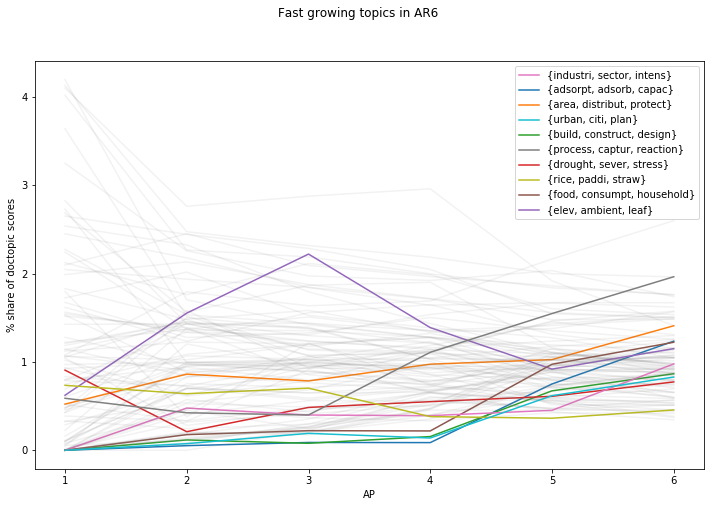

In [49]:
plt.rcParams["figure.figsize"] = (12,7.5)

topics = DynamicTopic.objects.filter(
    run_id=run_id,timedtopic__period__title="AR6"
).order_by('-timedtopic__pgrowth')[:10].values_list('title',flat=True)
plots = []
plots = [x for x in topics]
print(plots)
lvalues = [x for x in topics]
for name, group in df.groupby('dtopic__title'):
    #group = group.set_index('period__n')
    if name in topics:      
        p = plt.plot(group['period__n'],group['share'])
        for i, pl in enumerate(plots):
            if pl ==name:
                plots[i] = p[0]
        lvalues.append(name)
    else:
        plt.plot(group['period__n'],group['share'],color="grey",alpha=0.1)

        

plt.legend(plots,lvalues,title='')
plt.suptitle("Fast growing topics in AR6")
plt.xlabel('AP')
plt.ylabel('% share of doctopic scores')

plt.savefig('../plots/ar6_growth_{}.png'.format(run_id),bbox_inches='tight')
plt.show()

['{adsorpt, adsorb, capac}', '{urban, citi, plan}', '{food, consumpt, household}', '{build, construct, design}', '{inject, storag, reservoir}', '{habitat, conserv, biodivers}', '{communiti, microbi, composit}', '{ghg, greenhous, gas}', '{project, futur, rcp}', '{risk, vulner, disast}']


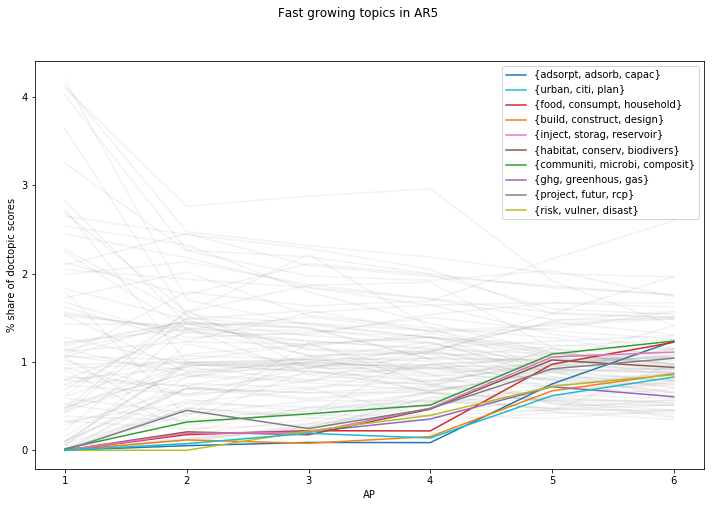

In [48]:
plt.rcParams["figure.figsize"] = (12,7.5)

topics = DynamicTopic.objects.filter(
    run_id=run_id,timedtopic__period__title="AR5"
).order_by('-timedtopic__pgrowth')[:10].values_list('title',flat=True)
plots = []
plots = [x for x in topics]
print(plots)
lvalues = [x for x in topics]
for name, group in df.groupby('dtopic__title'):
    #group = group.set_index('period__n')
    if name in topics:      
        p = plt.plot(group['period__n'],group['share'])
        for i, pl in enumerate(plots):
            if pl ==name:
                plots[i] = p[0]
        lvalues.append(name)
    else:
        plt.plot(group['period__n'],group['share'],color="grey",alpha=0.1)

        

plt.legend(plots,lvalues,title='')
plt.suptitle("Fast growing topics in AR5")
plt.xlabel('AP')
plt.ylabel('% share of doctopic scores')

plt.savefig('../plots/ar5_growth_{}.png'.format(run_id),bbox_inches='tight')
plt.show()